<a href="https://colab.research.google.com/github/Prasadchaskar/Potato-Disease/blob/main/Potato_disease2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import cv2
import numpy as np
import PIL

In [36]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=8

In [37]:
from pathlib import Path
my_path = Path(r'/content/PlantVillage')

In [38]:
Potato___Early_blight = list(my_path.glob('Potato___Early_blight/*'))
Potato___Late_blight = list(my_path.glob('Potato___Late_blight/*'))
Potato___Late_blight = list(my_path.glob('Potato___Late_blight/*'))

In [39]:
for i in range(1,10,3):
  PIL.Image.open(Potato___Early_blight[i])

In [40]:
potato_images_dict = {
    'Potato___Early_blight': list(my_path.glob('Potato___Early_blight/*')),
    'Potato___Late_blight': list(my_path.glob('Potato___Late_blight/*')),
    'Potato___healthy': list(my_path.glob('Potato___healthy/*'))
}
potato_labels_dict = {
    'Potato___Early_blight': 0,
    'Potato___Late_blight': 1,
    'Potato___healthy': 2
}

In [41]:
X = []
y = []

for name,images in potato_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resize = cv2.resize(img,(256,256))
        X.append(resize)
        y.append(potato_labels_dict[name])

In [42]:
X = np.array(X)
y = np.array(y)

In [43]:
class_names = {0:'Potato___Early_blight',1:'Potato___Late_blight',2:'Potato___healthy'}

In [44]:
# plt.imshow(X_train_scaled[0])
# plt.title(class_names[y_train[0]]);

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [46]:
X_train_scaled = X_train / 255
X_test_scaled = X_test /  255

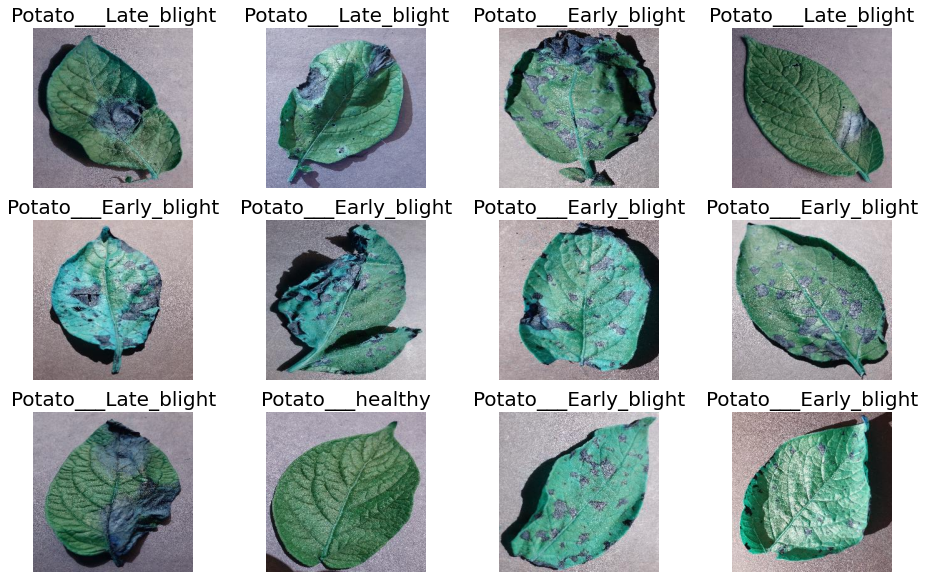

In [47]:
plt.figure(figsize=(16,10))
for i in range(12):
      ax = plt.subplot(3,4,i+1)
      plt.imshow(X_train_scaled[i])
      plt.title(class_names[y_train[i]],{'fontsize':20})
      plt.axis("off")

In [48]:
from tensorflow.keras import  models,layers
model = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(4, 4),
                  activation='relu', input_shape=(256, 256, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3),
                  activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(filters=124, kernel_size=(3, 3),
                  activation='relu'),
    layers.Dropout(0.5),
    layers.Flatten(),
    layers.Dense(270,activation='relu'),
    layers.Dense(3,activation='softmax')
]
)
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [53]:
model.fit(X_train_scaled,y_train,epochs=10)

Epoch 1/10
51/51 [==============================] - 21s 205ms/step - loss: 1.1783 - accuracy: 0.7429
Epoch 2/10
51/51 [==============================] - 10s 192ms/step - loss: 0.2518 - accuracy: 0.8959
Epoch 3/10
51/51 [==============================] - 10s 193ms/step - loss: 0.1714 - accuracy: 0.9356
Epoch 4/10
51/51 [==============================] - 10s 193ms/step - loss: 0.1344 - accuracy: 0.9473
Epoch 5/10
51/51 [==============================] - 10s 194ms/step - loss: 0.0690 - accuracy: 0.9746
Epoch 6/10
51/51 [==============================] - 10s 193ms/step - loss: 0.0394 - accuracy: 0.9851
Epoch 7/10
51/51 [==============================] - 10s 193ms/step - loss: 0.0270 - accuracy: 0.9913
Epoch 8/10
51/51 [==============================] - 10s 193ms/step - loss: 0.0040 - accuracy: 1.0000
Epoch 9/10
51/51 [==============================] - 10s 193ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 10/10
51/51 [==============================] - 10s 193ms/step - loss: 6.4443e-04 - ac

In [54]:
model.evaluate(X_test,y_test)

17/17 [==============================] - 2s 94ms/step - loss: 235.0493 - accuracy: 0.7268


[235.04933166503906, 0.7267658114433289]

In [55]:
y_pred = list()
for i in model.predict(X_test):
  y_pred.append(np.argmax(i))
y_pred = np.array(y_pred)

In [56]:
from sklearn.metrics import  classification_report,confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       244
           1       0.99      0.44      0.61       254
           2       0.25      1.00      0.40        40

    accuracy                           0.73       538
   macro avg       0.71      0.81      0.65       538
weighted avg       0.89      0.73      0.74       538



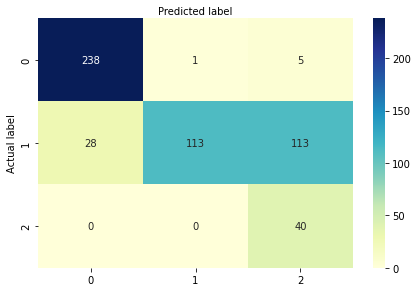

In [58]:
class_names = [0,1,2]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
cnf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'YlGnBu',
                fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()